In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Data Exploration:

In [2]:
data_train = pd.read_csv('Titanic_train.csv')# loading the dataset of titanic train
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data_test = pd.read_csv('Titanic_test.csv')# loading the dataset of titanic test
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Performing EDA 

In [4]:
# for titanic train data

In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
data_train.fillna({'Age' : data_train['Age'].median()},inplace=True)

In [8]:
# droping cabin column due to more than 70% values are nan
data_train.drop(columns='Cabin',inplace=True)

In [9]:
data_train.fillna({'Embarked' : data_train['Embarked'].mode()[0]},inplace=True)# 

In [10]:
data_train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [11]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [12]:
data_train.duplicated().sum()

np.int64(0)

In [13]:
data_train.shape

(891, 11)

In [14]:
data_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [15]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
data_train_numeric=data_train._get_numeric_data()

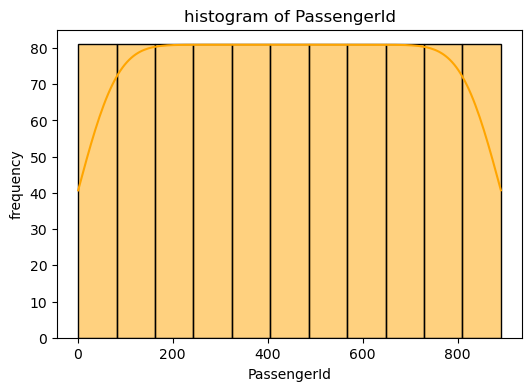

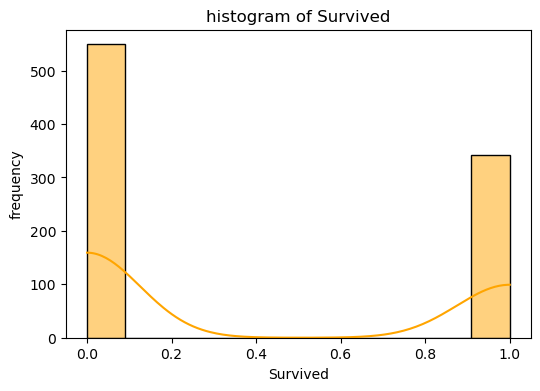

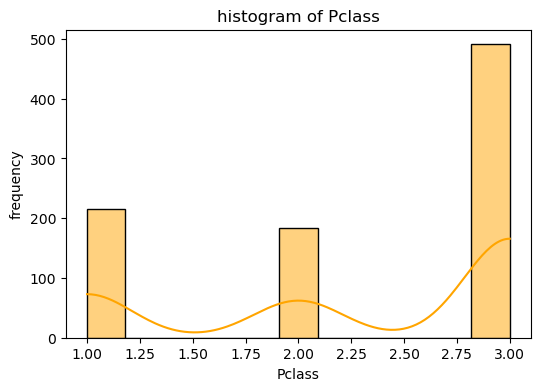

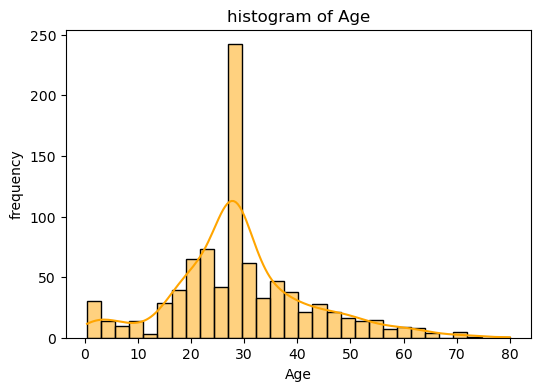

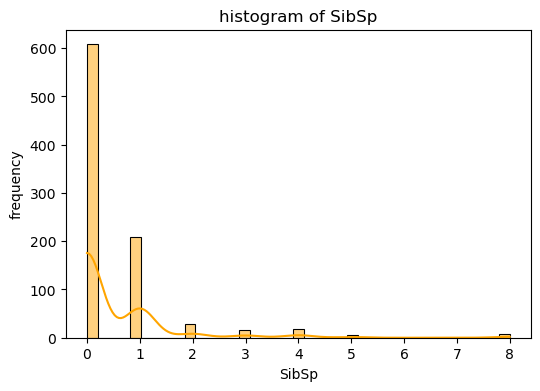

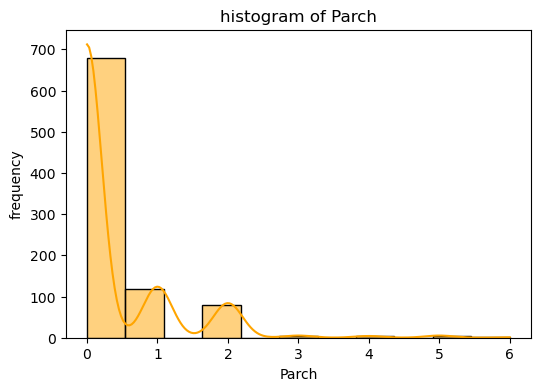

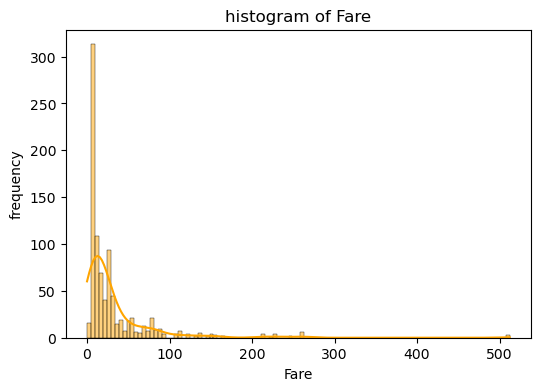

In [17]:
#creating histogram

for col in data_train_numeric.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(data_train[col],kde=True,color='orange',edgecolor='black')
    plt.title(f'histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('frequency')
    plt.show()

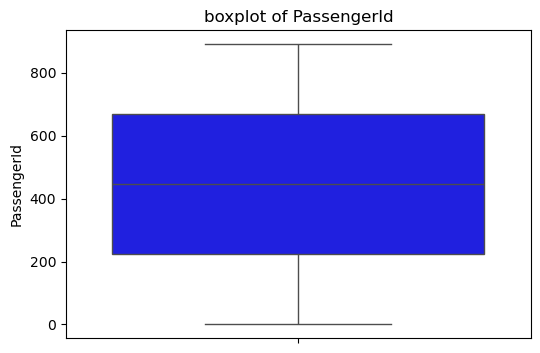

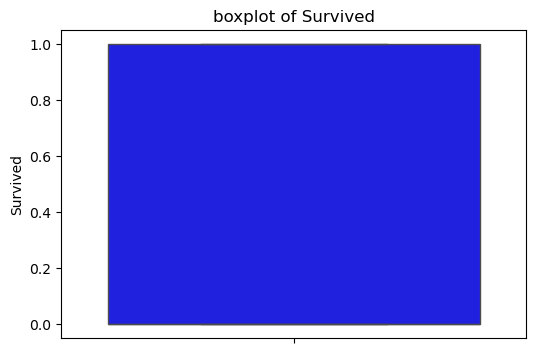

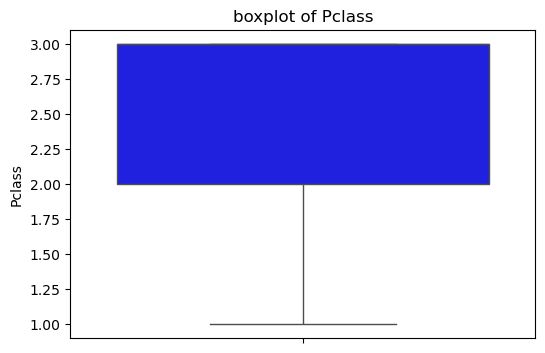

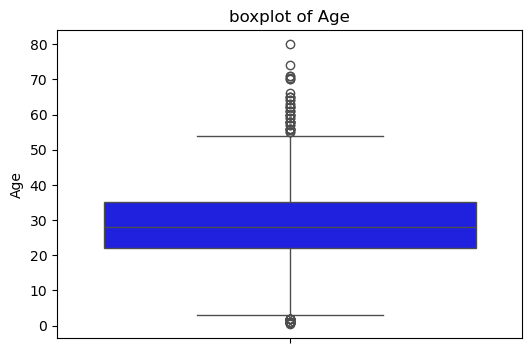

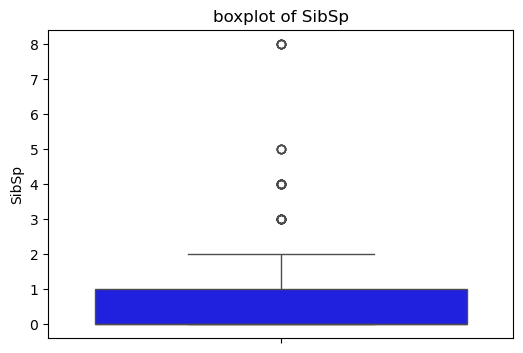

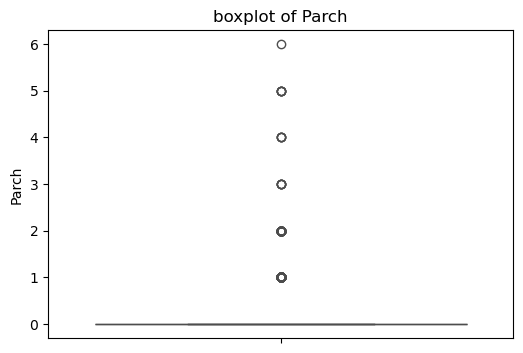

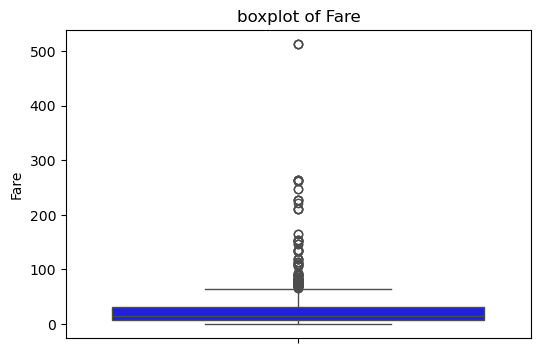

In [18]:
#Create boxplots for to identify outliers.

for col in data_train_numeric.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=data_train[col],color='blue')
    plt.title(f'boxplot of {col}')
    plt.show()

In [19]:
data_train_non_numeric=data_train.drop(data_train_numeric,axis=1)

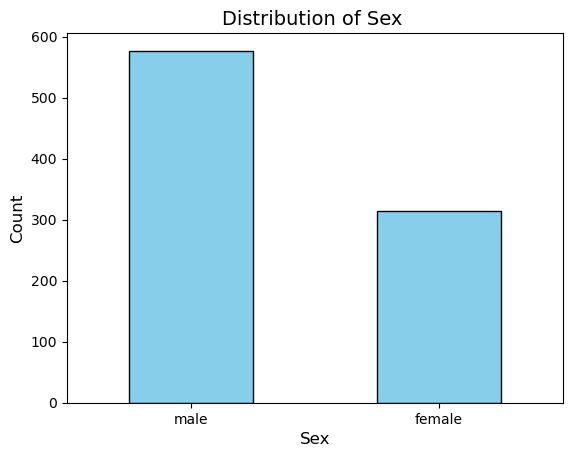

In [20]:
data_train['Sex'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Sex ', fontsize=14)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.show()

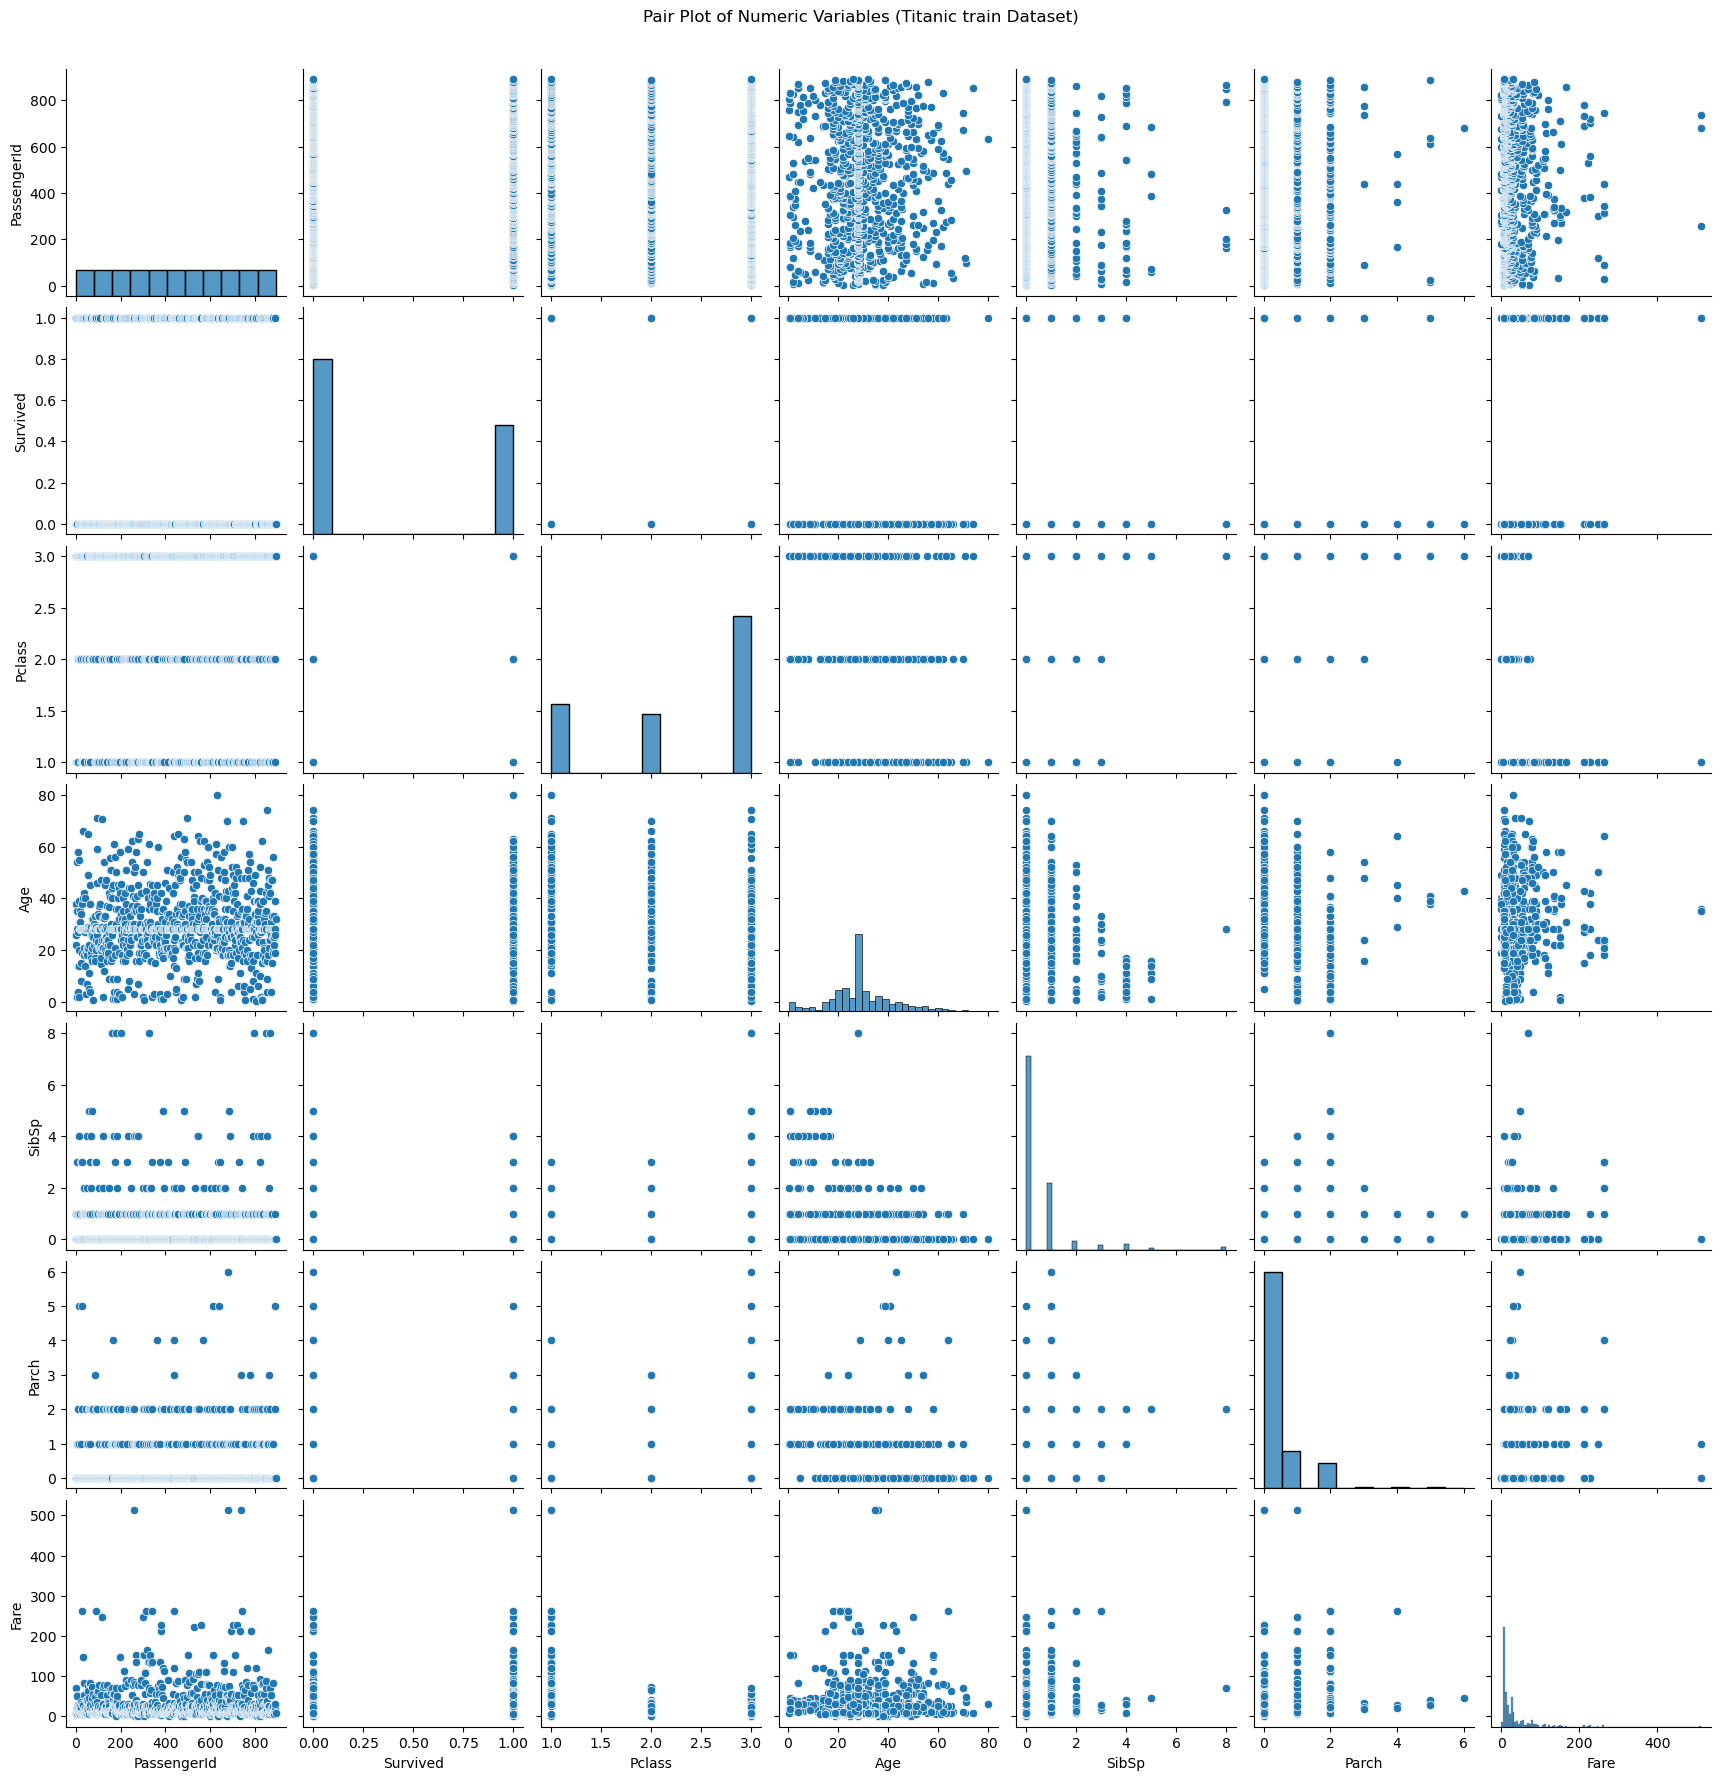

In [21]:
# pair plots
sns.pairplot(data_train_numeric)
plt.suptitle('Pair Plot of Numeric Variables (Titanic train Dataset)', y=1.02)
plt.show()

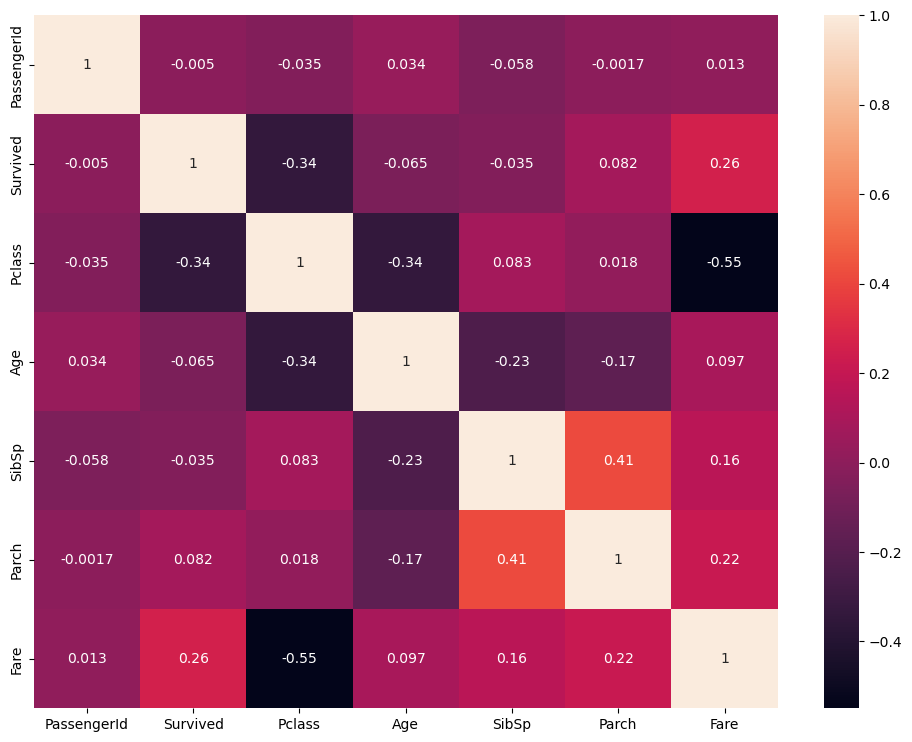

In [22]:
#correlation heatmap

plt.figure(figsize=(12,9))
sns.heatmap(data_train.corr(numeric_only=True),annot=True)
plt.show()

In [23]:
data_train = data_train.drop(['PassengerId','Name','Ticket'],axis=1)# because of they are not important

In [24]:
# EDA for data_train

In [25]:
data_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [26]:
data_test.fillna({'Age' : data_test['Age'].median()},inplace=True)

In [27]:
data_test.fillna({'Fare' : data_test['Fare'].median()},inplace=True)

In [28]:
# droping cabin column because more than 70% values or nan

data_test.drop(columns='Cabin',inplace=True)

In [29]:
data_test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [30]:
data_test.duplicated().sum()

np.int64(0)

In [31]:
data_test = data_test.drop(['PassengerId','Name','Ticket'],axis=1)

In [32]:
data_test.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,29.599282,0.447368,0.392344,35.576535
std,0.841838,12.703770,0.896760,0.981429,55.850103
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,23.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,35.750000,1.000000,0.000000,31.471875
max,3.000000,76.000000,8.000000,9.000000,512.329200


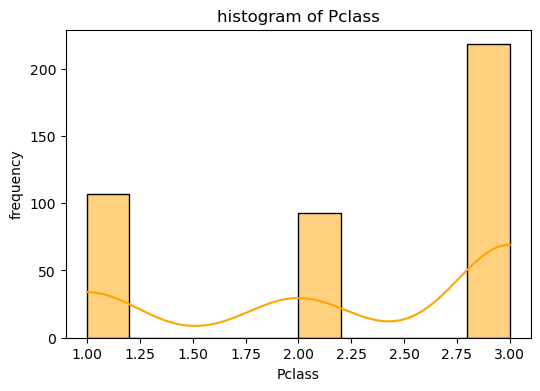

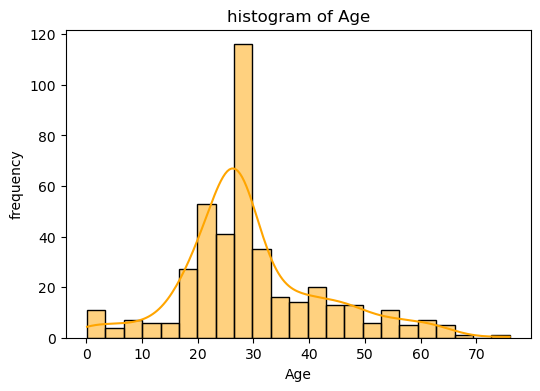

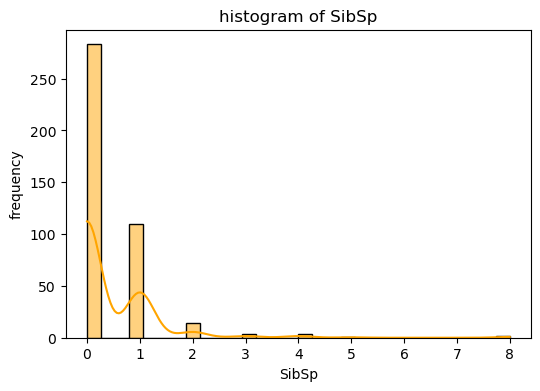

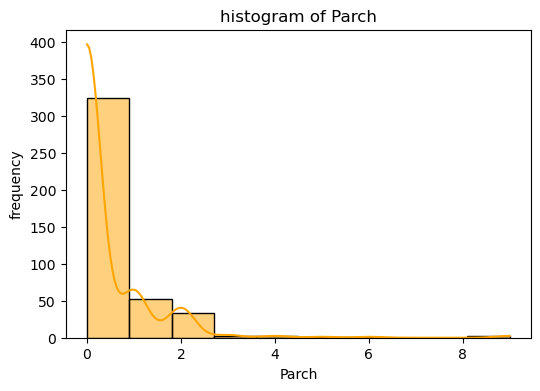

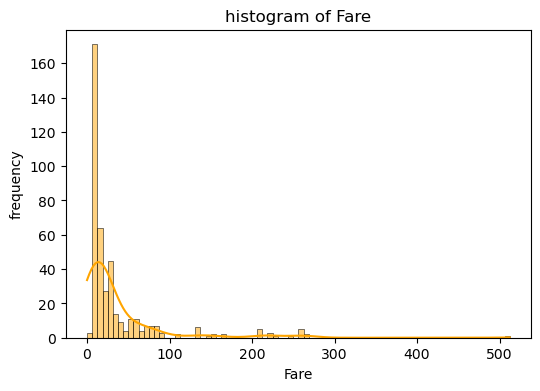

In [33]:
#creating histogram
data_test_numeric = data_test._get_numeric_data()
for col in data_test_numeric.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(data_test_numeric[col],kde=True,color='orange',edgecolor='black')
    plt.title(f'histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('frequency')
    plt.show()

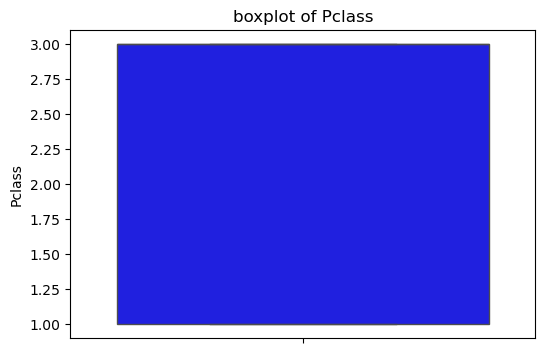

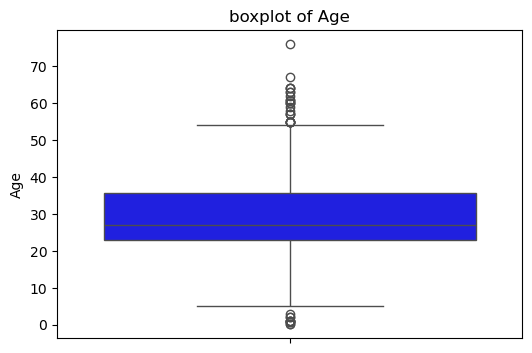

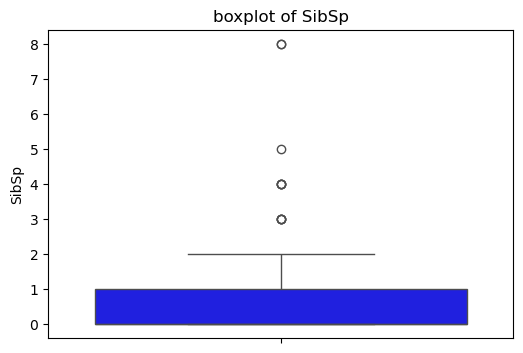

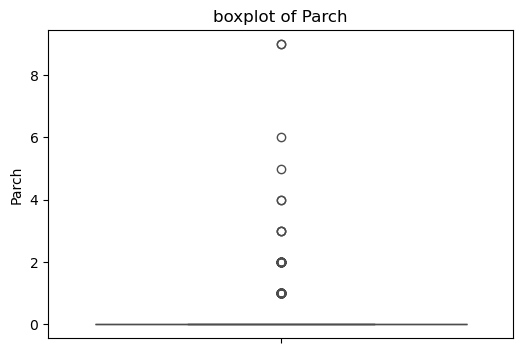

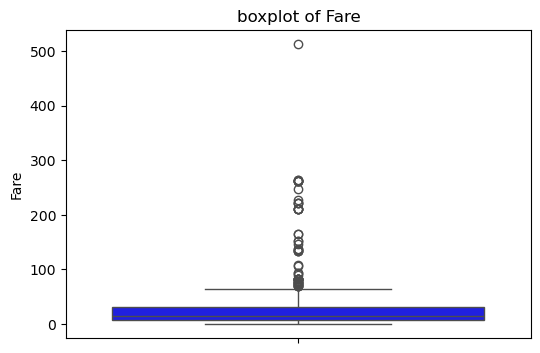

In [34]:
#Create boxplots for to identify outliers.

for col in data_test_numeric.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=data_test_numeric[col],color='blue')
    plt.title(f'boxplot of {col}')
    plt.show()

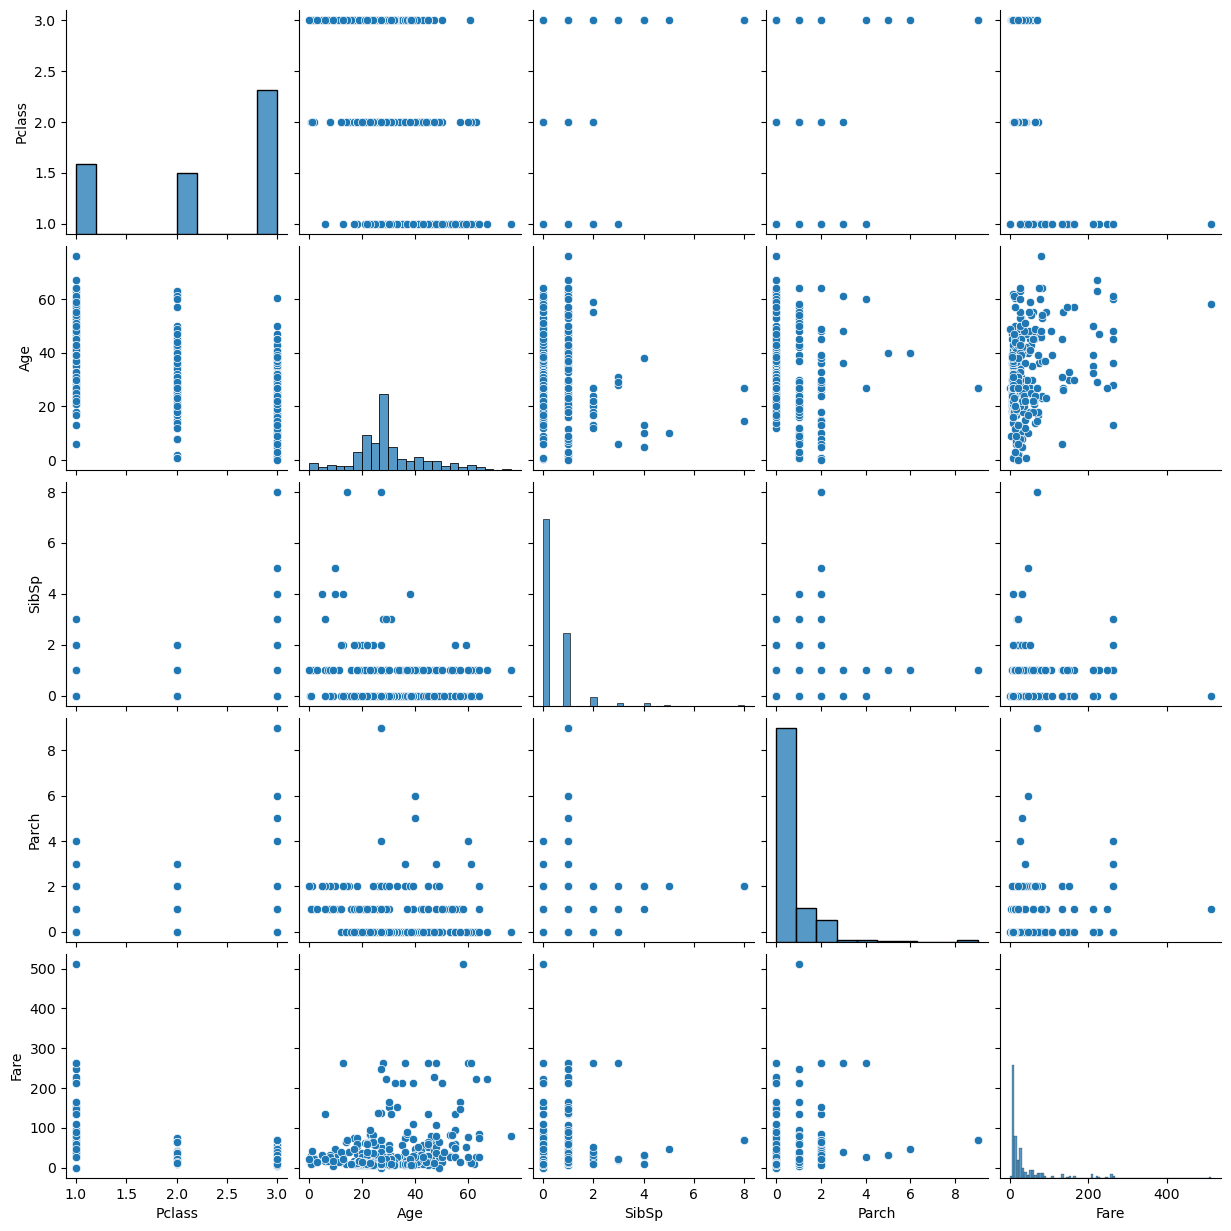

In [35]:
#pairplot

sns.pairplot(data_test_numeric)
plt.show()

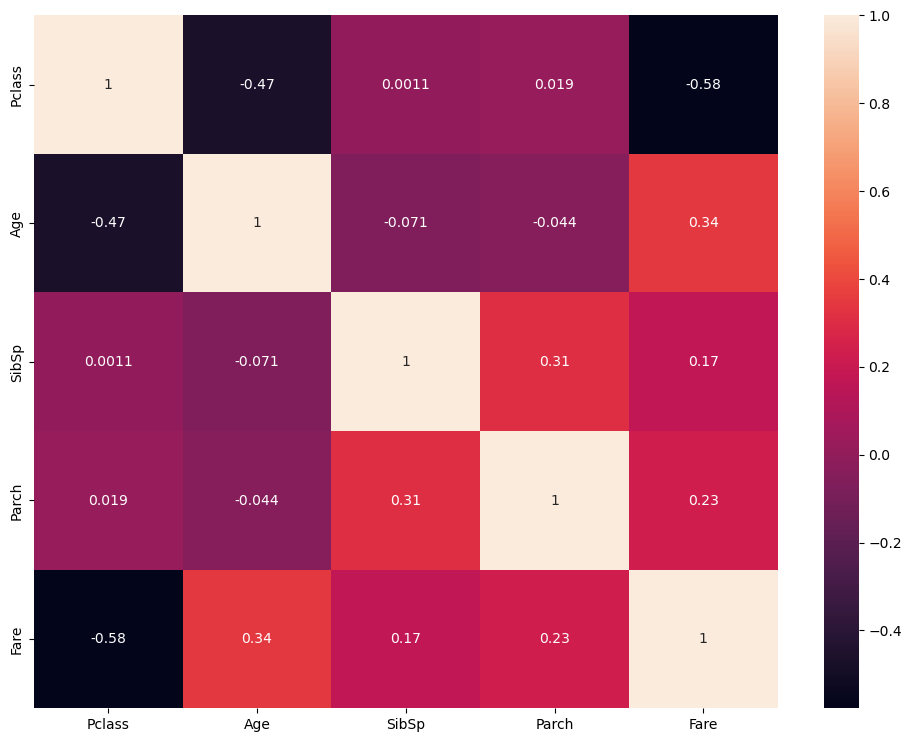

In [36]:
#correlation heatmap

plt.figure(figsize=(12,9))
sns.heatmap(data_test_numeric.corr(numeric_only=True),annot=True)
plt.show()

### 2. Data Preprocessing:

#### Encoding Catgorical train data

In [37]:
gender_map = {
    'male' : 0,
    'female' : 1
}
data_train['Sex'] = data_train['Sex'].map(gender_map)

In [38]:
embarked_map = {
    'S' : 0,
    'C' : 1,
    'Q' : 2
}
data_train['Embarked'] = data_train['Embarked'].map(embarked_map)

In [39]:
data_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0
887,1,1,1,19.0,0,0,30.0000,0
888,0,3,1,28.0,1,2,23.4500,0
889,1,1,0,26.0,0,0,30.0000,1


#### Encoding Catgorical test data

In [40]:
gender_map = {
    'male' : 0,
    'female' : 1
}
data_test['Sex'] = data_test['Sex'].map(gender_map)

In [41]:
embarked_map = {
    'S' : 0,
    'C' : 1,
    'Q' : 2
}
data_test['Embarked'] = data_test['Embarked'].map(embarked_map)

In [42]:
data_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,2
1,3,1,47.0,1,0,7.0000,0
2,2,0,62.0,0,0,9.6875,2
3,3,0,27.0,0,0,8.6625,0
4,3,1,22.0,1,1,12.2875,0
...,...,...,...,...,...,...,...
413,3,0,27.0,0,0,8.0500,0
414,1,1,39.0,0,0,108.9000,1
415,3,0,38.5,0,0,7.2500,0
416,3,0,27.0,0,0,8.0500,0


### 3. Model Building:

In [43]:
X = data_train.iloc[:,1:]
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,0,27.0,0,0,13.0000,0
887,1,1,19.0,0,0,30.0000,0
888,3,1,28.0,1,2,23.4500,0
889,1,0,26.0,0,0,30.0000,1


In [44]:
y = data_train['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(712, 7) (179, 7) (712,) (179,)


In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

### 4. Model Evaluation:

In [48]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:,1]

In [49]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score,roc_auc_score,roc_curve

In [50]:
a = accuracy_score(y_test,y_pred)
p = precision_score(y_test,y_pred)
r = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
roc_auc = roc_auc_score(y_test,y_pred_proba)
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test,y_pred)

In [51]:
print('model evaluation')
print(f'accuracy : {a:.2f}')
print(f'precision : {p:.2f}')
print(f'recall : {r:.2f}')
print(f'f1-score : {f1:.2f}')
print(f'roc-auc : {roc_auc:.2f}')
print(f'confusion matrix :\n',cm)
print(f'classification report :\n', cr)

model evaluation
accuracy : 0.80
precision : 0.77
recall : 0.73
f1-score : 0.75
roc-auc : 0.88
confusion matrix :
 [[89 16]
 [20 54]]
classification report :
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



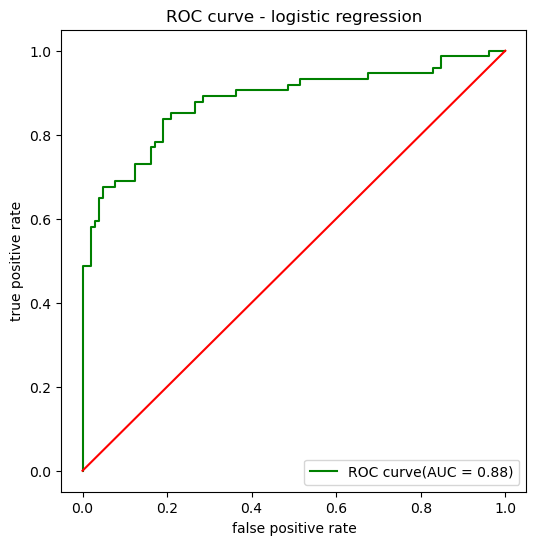

In [52]:
# Visualize the ROC curve.

fpr,tpr,threshold = roc_curve(y_test,y_pred_proba)
plt.figure(figsize=(6,6))
plt.plot(fpr,tpr,label=f'ROC curve(AUC = {roc_auc:.2f})',color='green')
plt.plot([0,1],[0,1],linestyle='-',color='red')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC curve - logistic regression')
plt.legend(loc = 'lower right')
plt.show()

### 5. Interpretation:

In [53]:
import statsmodels.api as sm

In [54]:
X = sm.add_constant(X)
logit_model = sm.Logit(y,X)
results = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.441226
         Iterations 6


In [55]:
coef = results.params
p_values = results.pvalues
odds_ratios = np.exp(coef)

In [56]:
summary_table = pd.DataFrame({
    'feature' : coef.index,
    'coefficient' : coef.values,
    'odds ration' : odds_ratios.values,
    'p-value' : p_values.values,
    'significant (p<0.05)' : p_values < 0.05
})
print(summary_table)

           feature  coefficient  odds ration       p-value  \
const        const     2.189090     8.927086  4.985880e-06   
Pclass      Pclass    -1.122733     0.325389  2.020050e-15   
Sex            Sex     2.716896    15.133282  3.098145e-42   
Age            Age    -0.039496     0.961274  4.135601e-07   
SibSp        SibSp    -0.329272     0.719447  2.442257e-03   
Parch        Parch    -0.085233     0.918298  4.703993e-01   
Fare          Fare     0.002229     1.002231  3.451503e-01   
Embarked  Embarked     0.243307     1.275460  8.649184e-02   

          significant (p<0.05)  
const                     True  
Pclass                    True  
Sex                       True  
Age                       True  
SibSp                     True  
Parch                    False  
Fare                     False  
Embarked                 False  


### 6. Deployment with Streamlit:

In [57]:
import pickle

In [58]:
from pickle import dump

In [59]:
filename = 'Logistic_Regression.sav'
pickle.dump(model,open(filename,'wb'))

In [60]:
loaded_model = pickle.load(open('Logistic_Regression.sav','rb'))

## Interview Questions:

### What is the difference between precision and recall?
     precision
     formula = TP/(TP+FP)
     meaning = out of all predicted positives, how many are actually positives
     focus = reliability of positive predictions
     Example = disease test of 100 predicted sick, 80 are actually sick -> precision = 80%

     recall
     formula = TP/(TP+FN)
     meaning = out of all actual positives, how many did the model correctly predict?
     focus = coverage of actual positives
     Example = disease test of 100 truly sick, model catches 90 -> recall = 90%

### What is cross-validation, and why is it important in binary classification?
     cross-validation evealutes a model by training and testing it on multiple data folds, giving a more reliable performance estimate.in binary classification, it reduces overfitting, handles class imbalance, and ensures robust,fair evaluation even with small datasets.